# Лабораторна робота №3: Decision Tree & Random Forest


In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install kagglehub[pandas-datasets]
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Набір даних Credit Card Fraud Detection
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Завантаження набору даних:

In [113]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
df = pd.read_csv(f"{path}/creditcard.csv")
print(f"Дані завантажено: {df.shape}")
df.head()

Дані завантажено: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Вихідний параметр: Class

Вхідні параметри: всі інші

In [114]:
print(df.info())
print("\nПропущених значень:")
print(df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Розподіл класів:

In [115]:
print(df['Class'].value_counts())
print(f"Відсоток шахрайських транзакцій: {df['Class'].mean()*100:.4f}%")

Class
0    284315
1       492
Name: count, dtype: int64
Відсоток шахрайських транзакцій: 0.1727%


Набір даних дуже не збалансований, необхідно використовувати метрику ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) та розподілити вибірку на навчальну та тестову зі збереженням пропорції класів

Кореляція:

([<matplotlib.axis.XTick at 0x1b2f3d7ef00>,
 [Text(0, 0, 'Time'),
  Text(1, 0, 'V1'),
  Text(2, 0, 'V2'),
  Text(3, 0, 'V3'),
  Text(4, 0, 'V4'),
  Text(5, 0, 'V5'),
  Text(6, 0, 'V6'),
  Text(7, 0, 'V7'),
  Text(8, 0, 'V8'),
  Text(9, 0, 'V9'),
  Text(10, 0, 'V10'),
  Text(11, 0, 'V11'),
  Text(12, 0, 'V12'),
  Text(13, 0, 'V13'),
  Text(14, 0, 'V14'),
  Text(15, 0, 'V15'),
  Text(16, 0, 'V16'),
  Text(17, 0, 'V17'),
  Text(18, 0, 'V18'),
  Text(19, 0, 'V19'),
  Text(20, 0, 'V20'),
  Text(21, 0, 'V21'),
  Text(22, 0, 'V22'),
  Text(23, 0, 'V23'),
  Text(24, 0, 'V24'),
  Text(25, 0, 'V25'),
  Text(26, 0, 'V26'),
  Text(27, 0, 'V27'),
  Text(28, 0, 'V28'),
  Text(29, 0, 'Amount'),
  Text(30, 0, 'Class')])

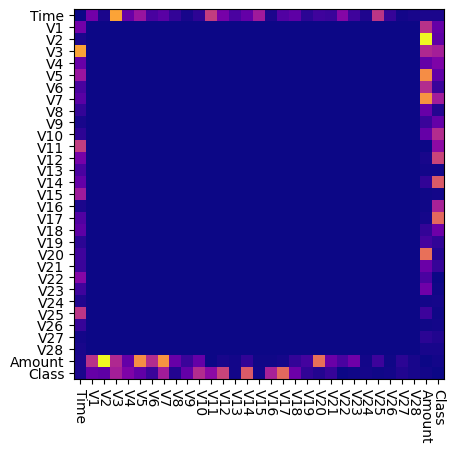

In [116]:
inputs = df.columns
outputs = df.columns

fig, ax = plt.subplots()

corr = pd.DataFrame()
corr_df = df.corr().to_numpy()
np.fill_diagonal(corr_df, 0)
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(corr_df[df.columns.get_loc(a), df.columns.get_loc(b)])

ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)

In [117]:
inputs = df.drop("Class", axis = 1).columns
outputs = ["Class"]
corr = pd.DataFrame()
corr_df = df.corr()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(corr_df.loc[a, b])
corr = corr.sort_values('Class', ascending=False)
print("Кореляція:")
corr.head(len(corr))

Кореляція:


,Class
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447
V18,0.111485


### Підготовка датасету:

In [118]:
X = df.drop('Class', axis=1)
Y = df['Class']

Розділ на навчальну та тестові вибірки:

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42, stratify=Y)

print(f"Train: {X_train.shape}, {y_train.mean()*100:.4f}% шахрайських")
print(f"Test:  {X_test.shape}, {y_test.mean()*100:.4f}% шахрайських")

Train: (142403, 30), 0.1727% шахрайських
Test:  (142404, 30), 0.1727% шахрайських


### Класифікатори

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Одне дерево рішень:

In [121]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Random Forest:

In [122]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Оцінка класифікаторів


=== Decision Tree ===
ROC-AUC: 0.8778201616271005

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.74      0.76      0.75       246

    accuracy                           1.00    142404
   macro avg       0.87      0.88      0.87    142404
weighted avg       1.00      1.00      1.00    142404



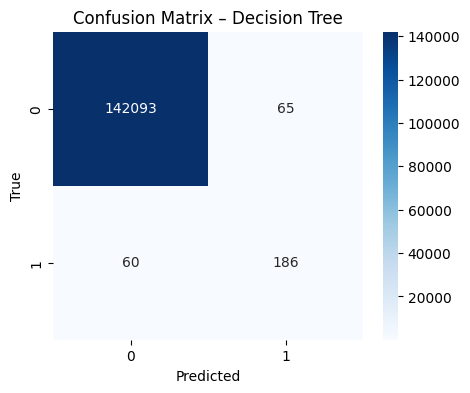


=== Random Forest ===
ROC-AUC: 0.9434189051298355

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.97      0.74      0.84       246

    accuracy                           1.00    142404
   macro avg       0.98      0.87      0.92    142404
weighted avg       1.00      1.00      1.00    142404



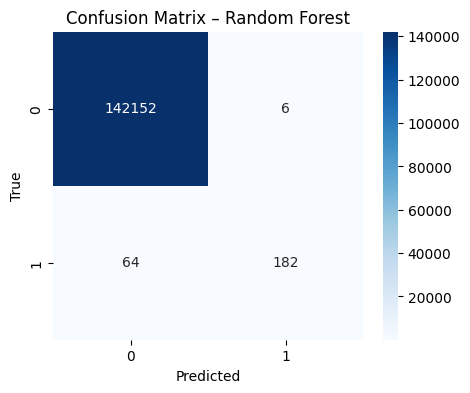

In [123]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"\n=== {name} ===")
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix – {name}')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

evaluate_model(dt, "Decision Tree")
evaluate_model(rf, "Random Forest")

### Важливість ознак

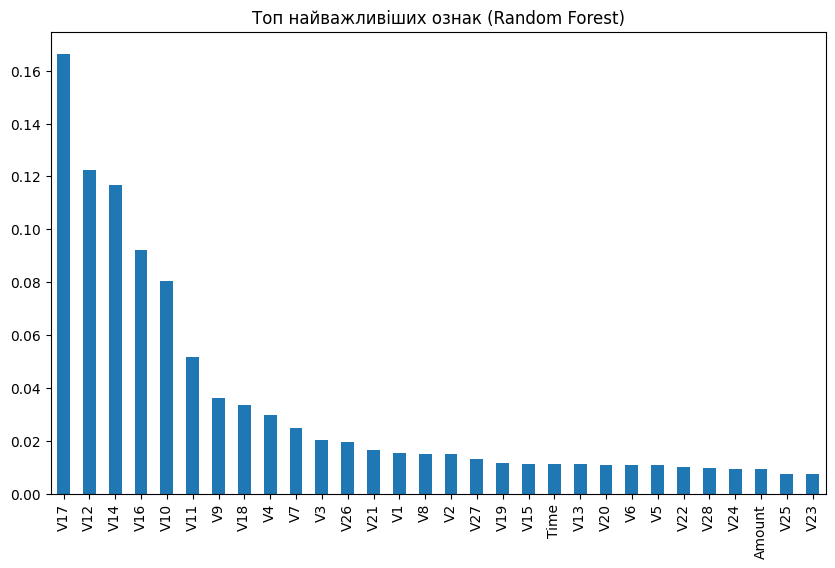

In [124]:
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importance.head(len(feat_importance)).plot(kind='bar')
plt.title('Топ найважливіших ознак (Random Forest)')
plt.show()

### Висновки

Random forest має значно менше False Positive. Кількість True Negative майже однакова в обох класифікаторів. 

Для даної задачі Random Forest краще за Decision Tree